In [70]:
import json

with open("/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/COCO_Format/ShipRSImageNet_bbox_train_level_0.json", 'r') as file:
    data = json.load(file)
    

In [71]:
data.keys()

dict_keys(['images', 'categories', 'annotations'])

In [72]:
data['images'].__len__()

2198

In [73]:
data['annotations'][0]

{'area': 34860.0,
 'category_id': 1,
 'ignore': 0,
 'segmentation': [[210.0, 52.0, 147.0, 82.0, 362.0, 529.0, 425.0, 499.0]],
 'iscrowd': 0,
 'bbox': [147, 52, 279, 478],
 'image_id': 1,
 'id': 1}

In [74]:
anno_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/*"

In [75]:
from glob import glob

In [76]:
ann_files = glob(anno_root)

In [77]:
ann_files[0]

'/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/000686.xml'

In [78]:
import xml.etree.ElementTree as elemTree


In [79]:
sample = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/2000000020.xml"
tree = elemTree.parse(sample)

In [80]:
root = tree.getroot()

In [81]:
root.tag

'annotation'

In [82]:
root.attrib

{}

In [83]:
for idx, child in enumerate(root):
    print(idx, child.tag, child.attrib)

0 annotator {}
1 source {}
2 port_id {}
3 Img_Resolution {}
4 folder {}
5 filename {}
6 size {}
7 object {}


In [84]:
'''	<object>
		<name>Cargo</name>
		<level_0>1</level_0>
		<level_1>3</level_1>
		<level_2>15</level_2>
		<level_3>40</level_3>
		<iscrowd>0</iscrowd>
		<truncted>0</truncted>
		<is_closed>0</is_closed>
		<Ship_size>middle</Ship_size>
		<Ship_location>sea</Ship_location>
		<Ship_env>
			<Ship_env_is_normal>1</Ship_env_is_normal>
			<Ship_env_is_fog>0</Ship_env_is_fog>
			<Ship_env_is_glint>0</Ship_env_is_glint>
			<Ship_env_is_dark>0</Ship_env_is_dark>
		</Ship_env>
		<Ship_area>728.0</Ship_area>
		<difficult>0</difficult>
        <rotated_box>
            <cx>154</cx>
            <cy>134</cy>
            <width>14</width>
            <height>52</height>
            <rot>0.618640</rot>
        </rotated_box>'''


for i in range(len(root[7][13])):
    a = root[7][13][i].text
    print(a)

154
134
14
52
0.618640


In [85]:
# This is a center format (cx, cy, width, height, rot)
# DOTA is 8 coordinates poly 

center_box = [154,134,14,52,0.618640]

top_left  = [center_box[0] - center_box[2]/2, center_box[1] + center_box[3]/2]
top_right = [center_box[0] + center_box[2]/2, center_box[1] + center_box[3]/2]
bottom_left = [center_box[0] - center_box[2]/2, center_box[1] - center_box[3]/2]
bottom_right = [center_box[0] + center_box[2]/2, center_box[1] - center_box[3]/2]

rect_box = [top_left,top_right,bottom_left,bottom_right]

In [86]:
x_values = [i[0] for i in rect_box]
y_values = [i[1] for i in rect_box]

In [87]:
x_values

[147.0, 161.0, 147.0, 161.0]

In [88]:
y_values

[160.0, 160.0, 108.0, 108.0]

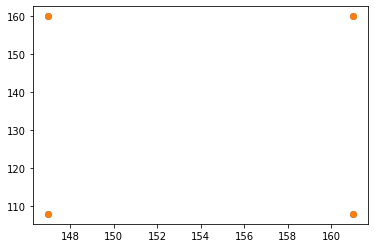

In [89]:
import matplotlib.pyplot as plt 
plt.scatter(x_values,y_values)
plt.scatter(x_values,y_values)
plt.show()

# Rotating Box

In [90]:
import math
import numpy as np

theta = math.pi / 20 

xc = 14
yc = 52

# Counter-clockwise, rotation of a vector v by an angle theta  
R = [ [math.cos(theta),-math.sin(theta), xc*(1-math.cos(theta)) + yc*(math.sin(theta))],
      [math.sin(theta),math.cos(theta),  yc*(1-math.cos(theta)) + xc*(math.sin(theta))]]

R = np.array(R)

In [91]:
new_box = []
for pos in rect_box:
    pos = pos + [1]
    #print(pos)
    new_pos = R @ pos
    new_box.append(new_pos)

In [92]:
rect_box

[[147.0, 160.0], [161.0, 160.0], [147.0, 108.0], [161.0, 108.0]]

In [93]:
new_box

[array([128.46762707, 183.85628966]),
 array([142.29526384, 186.04637217]),
 array([136.60221926, 132.49649594]),
 array([150.42985603, 134.68657846])]

In [94]:
new_box

[array([128.46762707, 183.85628966]),
 array([142.29526384, 186.04637217]),
 array([136.60221926, 132.49649594]),
 array([150.42985603, 134.68657846])]

In [95]:
# 좌표변환 visualization

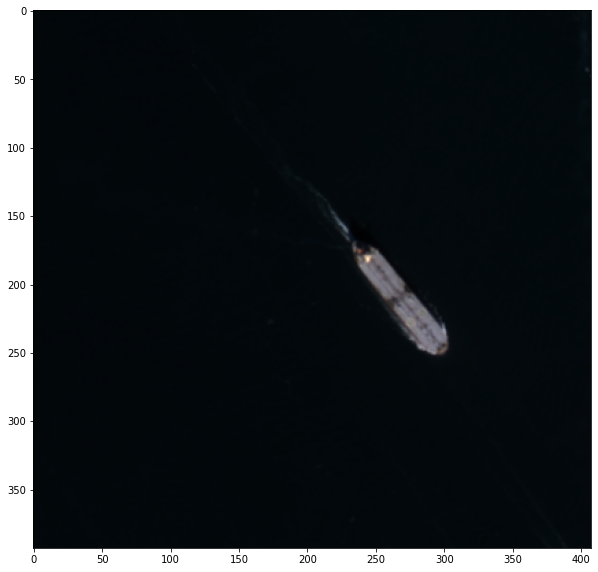

In [96]:
from PIL import Image

img = Image.open("/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/JPEGImages/2000000019.bmp")
#plt.scatter(x_values,y_values)

plt.figure(figsize=(10,10))
plt.imshow(img)


# Load Annotation Function

In [121]:
from PIL import Image

In [122]:
R2.shape

(2, 2)

In [179]:
math.degrees(0.6)

34.37746770784939

center_box :  [152, 109, 20, 96, '0.637584']
(142.0, 61.0)


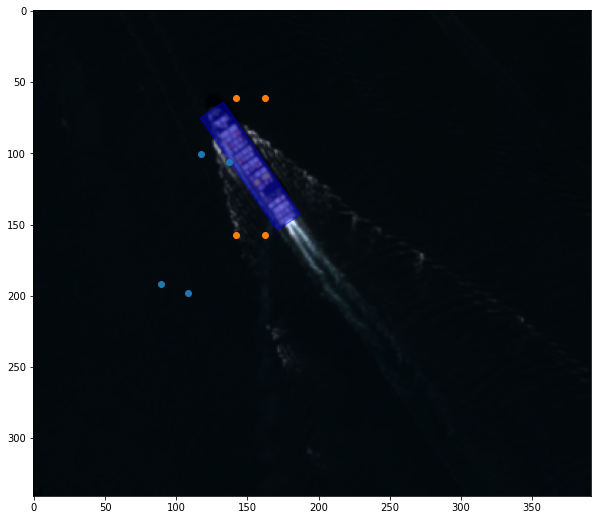

In [188]:
# libs 
import matplotlib.patches as patches
import matplotlib as mpl

# ann_files 
anno_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/*"
ann_files = glob(anno_root)


# file_name load 
sample_id = "2000000013"
ann_sample_full = f"/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/{sample_id}.xml"
img_sample_full = f"/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/JPEGImages/{sample_id}.bmp"


#----------------------------------------------------
# center box 
tree = elemTree.parse(ann_sample_full)
root = tree.getroot()

center_box = []
for i in range(len(root[7][13])):
    a = root[7][13][i].text
    if i != 4: a = int(a)
    center_box.append(a)
print("center_box : ", center_box)



# 4 coordinate
top_left  = [center_box[0] - center_box[2]/2, center_box[1] + center_box[3]/2]
top_right = [center_box[0] + center_box[2]/2, center_box[1] + center_box[3]/2]
bottom_left = [center_box[0] - center_box[2]/2, center_box[1] - center_box[3]/2]
bottom_right = [center_box[0] + center_box[2]/2, center_box[1] - center_box[3]/2]

# rect box 
rect_box = [top_left,top_right,bottom_left,bottom_right]


#----------------------------------------------------
# Rotation 
theta = 0.3

xc = center_box[2]
yc = center_box[3]

# 1. Center 좌표를 옮기는 matrix 
# Counter-clockwise, rotation of a vector v by an angle theta  
R1 = [ [math.cos(theta),-math.sin(theta), xc*(1-math.cos(theta)) + yc*(math.sin(theta))],
      [math.sin(theta),math.cos(theta),  yc*(1-math.cos(theta)) + xc*(math.sin(theta))]]
R1 = np.array(R1)

# 2. Center 좌표 옮기지 않고 rotation 
# Counter-clockwise, rotation   q
R2 = [ [math.cos(theta),-math.sin(theta) ],
      [math.sin(theta),math.cos(theta)  ]]
R2 = np.array(R2)


R = R2
new_box = []
for pos in rect_box:  
    #pos = pos + [1]
    #print(pos)
    new_pos = R @ pos
    new_box.append(new_pos)



x_values = [i[0] for i in rect_box]
y_values = [i[1] for i in rect_box]

new_x_values = [i[0] for i in new_box]
new_y_values = [i[1] for i in new_box]



# patch Rectangle 
# (좌상단 좌표), width, heigth 
print((bottom_left[0],bottom_left[1]))


# from new box 
#r1 = patches.Rectangle((new_box[0][0],new_box[0][1]),center_box[3],center_box[4],color="blue", alpha=0.50)
#=> patches.Rectangle 은, 좌하단 기준 width, height 를 계산한다. 

#---- method 1 
r1 = patches.Rectangle((bottom_left[0],bottom_left[1]), center_box[2], center_box[3], angle= -math.degrees(0.6), rotation_point=(center_box[0],center_box[1]) ,color="blue", alpha=0.40) 
#=> 좌상단 기준 시계방향 Theta,, 

# 문제는,, angle 은 정확하게 먹히는데, 좌상단을 기준으로 theta 가 계산된다. 
# center 기준으로 계산해야되는 듯 한데. 
# => https://math.stackexchange.com/questions/4680043/given-a-rotated-rectangle-with-known-center-coordinates-width-height-and-angl

# center 기준으로 회전, 시키고, counter-clock-wise, 역시계방향이 되어야함. 

#t1 = mpl.transforms.Affine2D().rotate_deg(90) # + ax.transData
#r1.set_transform(t1) 


fig, ax = plt.subplots(figsize=(10,10))


# add box 
ax.add_patch(r1)

img = Image.open(img_sample_full)


#plt.figure(figsize=(10,10))
plt.scatter(new_x_values,new_y_values)
plt.scatter(x_values,y_values)
plt.imshow(img)



center_box :  [152, 109, 20, 96, '0.637584']
(142.0, 61.0)


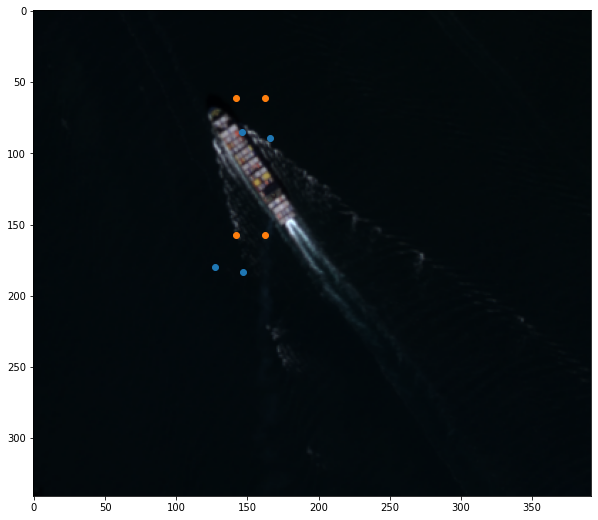

In [156]:
# libs 
import matplotlib.patches as patches
import matplotlib as mpl

# ann_files 
anno_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/*"
ann_files = glob(anno_root)


# file_name load 
sample_id = "2000000013"
ann_sample_full = f"/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/Annotations/{sample_id}.xml"
img_sample_full = f"/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/JPEGImages/{sample_id}.bmp"


#----------------------------------------------------
# center box 
tree = elemTree.parse(ann_sample_full)
root = tree.getroot()

center_box = []
for i in range(len(root[7][13])):
    a = root[7][13][i].text
    if i != 4: a = int(a)
    center_box.append(a)
print("center_box : ", center_box)



# 4 coordinate
top_left  = [center_box[0] - center_box[2]/2, center_box[1] + center_box[3]/2]
top_right = [center_box[0] + center_box[2]/2, center_box[1] + center_box[3]/2]
bottom_left = [center_box[0] - center_box[2]/2, center_box[1] - center_box[3]/2]
bottom_right = [center_box[0] + center_box[2]/2, center_box[1] - center_box[3]/2]

# rect box 
rect_box = [top_left,top_right,bottom_left,bottom_right]


#----------------------------------------------------
# Rotation 

theta = radinan = 0.3

cx = center_box[2]
cy = center_box[3]

# 1. Center 좌표를 옮기는 matrix 
# Counter-clockwise, rotation of a vector v by an angle theta  
R1 = [ [math.cos(theta),-math.sin(theta), cx*(1-math.cos(theta)) + cy*(math.sin(theta))],
      [math.sin(theta),math.cos(theta),  cy*(1-math.cos(theta)) + cx*(math.sin(theta))]]
R1 = np.array(R1)

# 2. Center 좌표 옮기지 않고 rotation 
# Counter-clockwise, rotation   q
R2 = [ [math.cos(theta),-math.sin(theta) ],
      [math.sin(theta),math.cos(theta)  ]]
R2 = np.array(R2)
R = R2


# opencv sample 
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.
    The angle should be given in radians.
    
    modified from answer here: https://stackoverflow.com/questions/34372480/rotate-point-about-another-point-in-degrees-python
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return int(qx), int(qy)


new_box = []
for pos in rect_box:  
    #pos = pos + [1]
    #print(pos)
    #new_pos = R @ pos
    
    
    new_pos = rotate( (cx,cy) , pos, 0.2 )
    new_box.append(new_pos)



x_values = [i[0] for i in rect_box]
y_values = [i[1] for i in rect_box]

new_x_values = [i[0] for i in new_box]
new_y_values = [i[1] for i in new_box]



# patch Rectangle 
# (좌상단 좌표), width, heigth 
print((bottom_left[0],bottom_left[1]))


# from new box 
#r1 = patches.Rectangle((new_box[0][0],new_box[0][1]),center_box[3],center_box[4],color="blue", alpha=0.50)
#=> patches.Rectangle 은, 좌하단 기준 width, height 를 계산한다. 

#---- method 1 
r1 = patches.Rectangle((bottom_left[0],bottom_left[1]), center_box[2], center_box[3], angle=-30, color="blue", alpha=0.50)  

# 문제는,, angle 은 정확하게 먹히는데, 좌상단을 기준으로 theta 가 계산된다. 
# center 기준으로 계산해야되는 듯 한데. 
# => https://math.stackexchange.com/questions/4680043/given-a-rotated-rectangle-with-known-center-coordinates-width-height-and-angl

# center 기준으로 회전, 시키고, counter-clock-wise, 역시계방향이 되어야함. 

#t1 = mpl.transforms.Affine2D().rotate_deg(90) # + ax.transData
#r1.set_transform(t1) 

ax.add_patch(r1)



#--------------------------------------------------------------------
img = Image.open(img_sample_full)

plt.figure(figsize=(10,10))
plt.scatter(new_x_values,new_y_values)
plt.scatter(x_values,y_values)
plt.imshow(img)



# Rotating Bounding Box 

In [99]:
import math

a = math.pi / 6 
math.cos(a)

0.8660254037844387

In [100]:
math.cos(0)

1.0

In [101]:
theta = 0

R = [ [math.cos(theta),-math.sin(theta)],
      [math.sin(theta),math.cos(theta)]]



In [102]:
# 남은 task angle 돌리기, 그전에 사진에 다가 label projection 해봐야함. 

In [103]:
img = "/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/JPEGImages/2000000020.bmp"

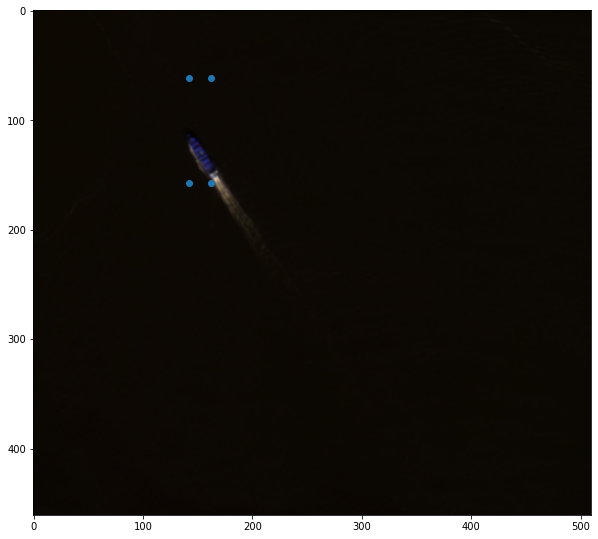

In [104]:
import cv2

image = cv2.imread(img)
plt.figure(figsize=(10,10))

# 
plt.scatter(x_values,y_values)
plt.imshow(image)

In [105]:
image_lst = glob("/mnt/hdd/eric/.tmp_ipy/00.Data/ShipRS_dataset/ShipRSImageNet_V1/VOC_Format/JPEGImages/*")

In [106]:
import numpy as np 
import os
from PIL import Image


def view_images(images=None, title = '', aug = None , masks=None):
    cols = 4
    rows = 4
    fig, axs = plt.subplots(cols, rows, figsize=(25,20))
    
    for im in range(0, cols * rows):
        #data = pydicom.read_file(os.path.join(TRAIN_IMG_PATH,'ID_'+images[im]+ '.dcm'))
        #image = data.pixel_array
        #window_center , window_width, intercept, slope = get_windowing(data)
        #image_windowed = window_image(image, window_center, window_width, intercept, slope)
        i = im // rows
        j = im % rows

        if not masks :
          img = Image.open(os.path.join(image_lst[im]))
        else:
          img = Image.open(os.path.join("/content/masks/"+ mask_lst[im]))
        img_np = np.array(img)
        axs[i,j].imshow(img_np, cmap=plt.cm.bone) 
        axs[i,j].axis('off')
        axs[i,j].set_title(f'{[i for i in image_lst[im].split("/")][-1]}')
    plt.tight_layout()    
    #plt.suptitle(f"{im}")
    #plt.title(f"{}")
    plt.show()

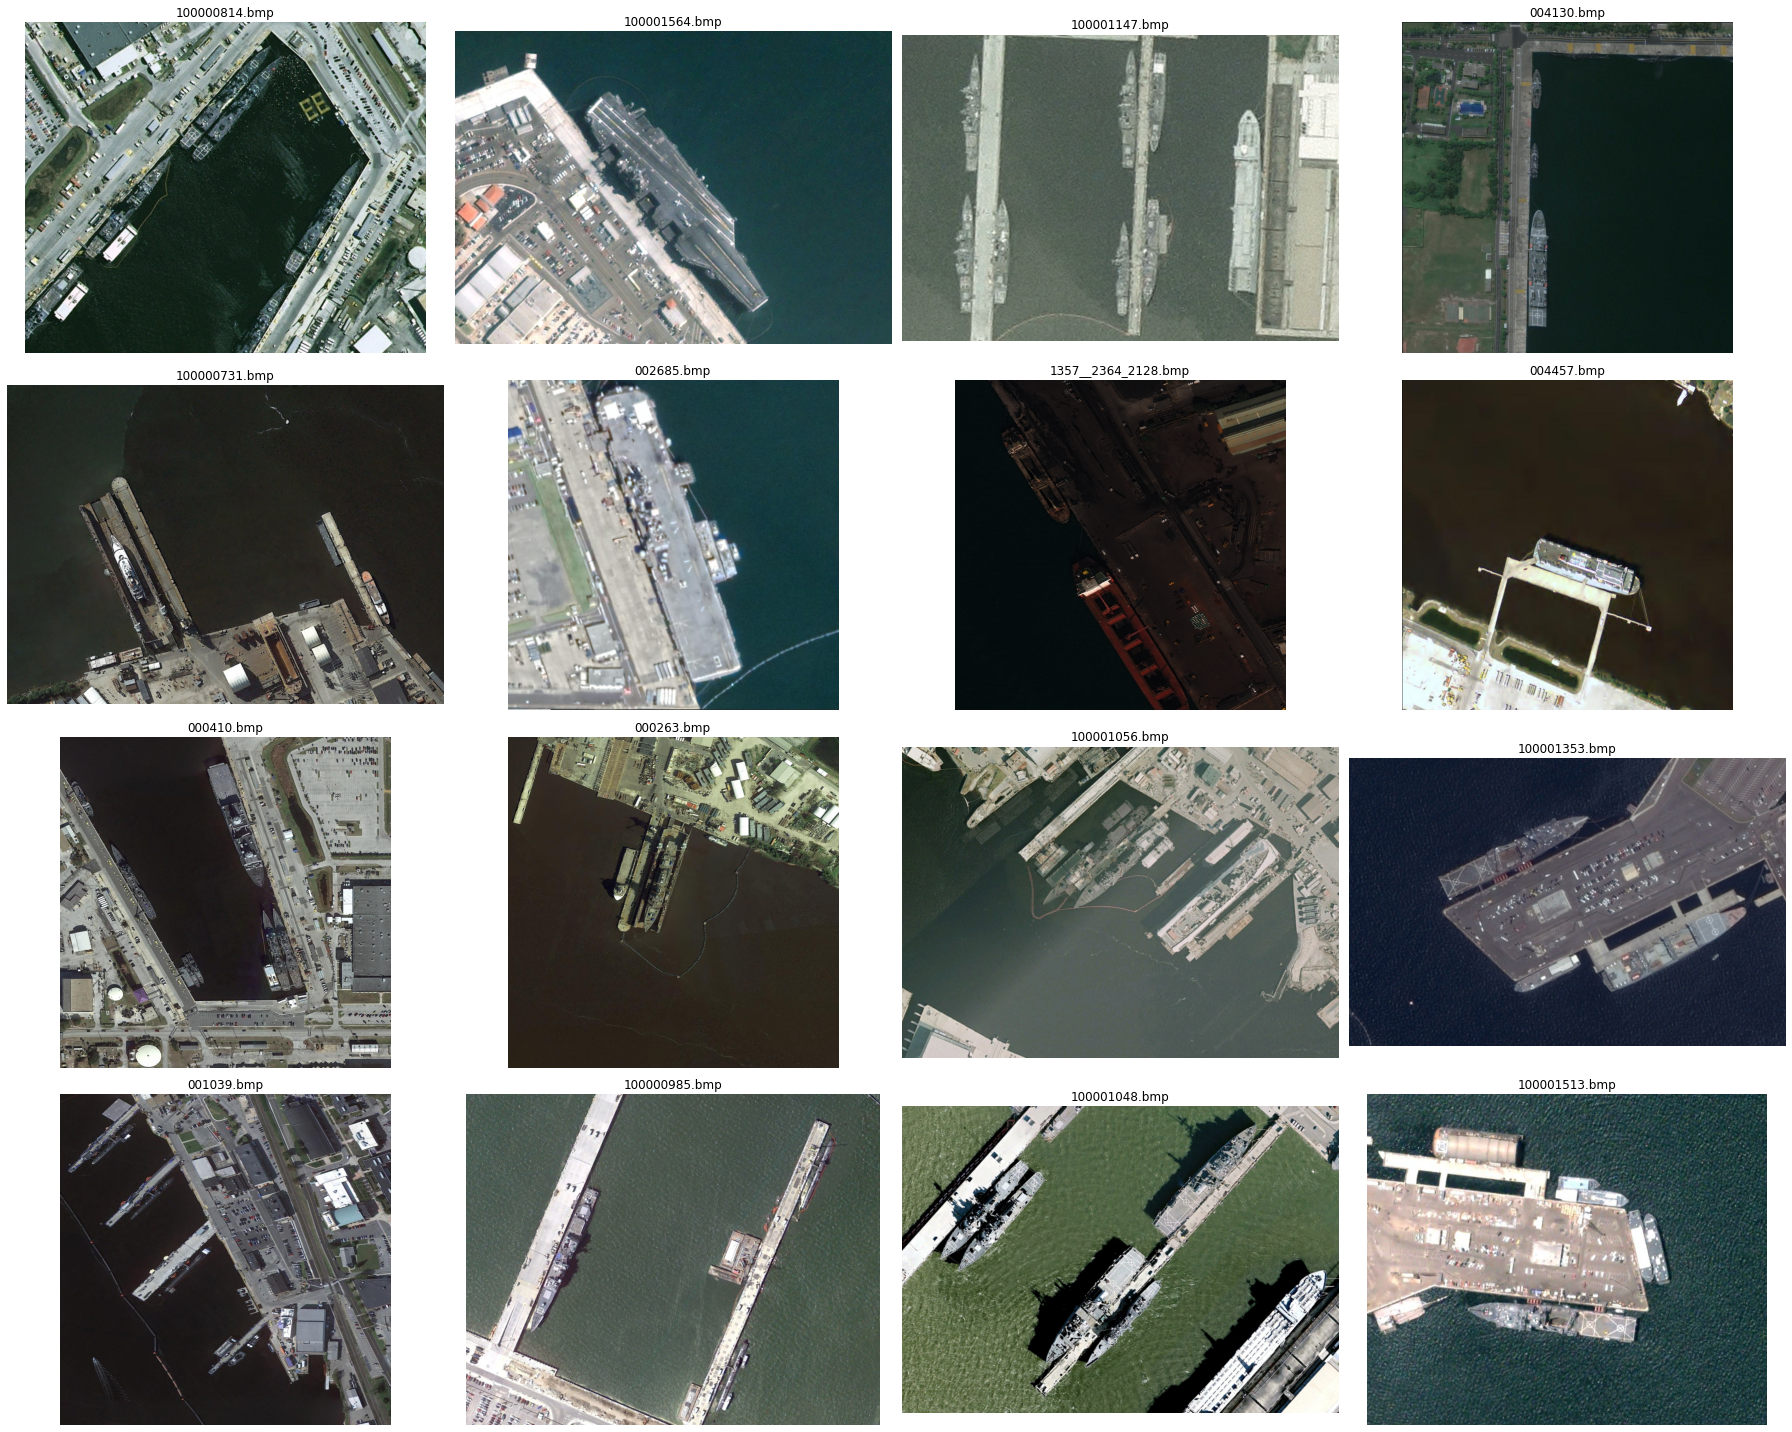

In [107]:
view_images(image_lst)

In [142]:
# 객체가 하나가 아닐꺼다. 


In [144]:
math.radians(45)

0.7853981633974483

In [141]:

import numpy as np
from numpy import sin, cos, sqrt, pi
import math
import matplotlib.pyplot as plt 

center = (332, 209)
width = 56
height = 33
degrees = -77

# topleft
pt1 = [center[0] - width, center[1] - height]
# btmleft
pt2 = [center[0] - width, center[1] + height]
# btmright
pt3 = [center[0] + width, center[1] + height]
# topright
pt4 = [center[0] + width, center[1] - height]

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.
    The angle should be given in radians.
    
    modified from answer here: https://stackoverflow.com/questions/34372480/rotate-point-about-another-point-in-degrees-python
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return int(qx), int(qy)

rectangle = [pt1, pt2, pt3, pt4, pt1]

rectangle_rotated = [rotate(center, pt,  math.radians(degrees)) for pt in rectangle]

rectangle = np.array(rectangle)
rectangle_rotated = np.array(rectangle_rotated)

# these are what you need
x_min, y_min = np.min(rectangle_rotated,axis=0)
x_max, y_max = np.max(rectangle_rotated,axis=0)

# create bounding rect points
pt1 = [x_min, y_min]
pt2 = [x_min, y_max]
pt3 = [x_max, y_max]
pt4 = [x_max, y_min ]

rectangle_bounding = [pt1, pt2, pt3, pt4, pt1]

# plot input rectangle in blue, rotated in red, bounding in green
plt.plot(np.array(rectangle)[:,0], np.array(rectangle)[:,1], "bo-")
plt.plot(np.array(rectangle_rotated)[:,0], np.array(rectangle_rotated)[:,1], "ro-")
plt.plot(np.array(rectangle_bounding)[:,0], np.array(rectangle_bounding)[:,1], "go-")
plt.show()

print(f"Rotated bounding rectangle: ({x_min},{y_min}), ({x_max},{y_max})")

Rotated bounding rectangle: (287,147), (376,270)
